# **SOTER: Quick ID & Background Checking for Credit Risk Analysis**

- Group 04
- Group Members: Ronaldo Syahputra, Titian F. Prasasti, Daniel Satria, Prabaningrum H.B., Radyatra Sidharta
- Batch: 001-HCK

**This notebook is part of the final project in the Data Science bootcamp at Hacktiv8.**

### a. Table of Content
- I. Introduction
    - a. Table of Content
    - b. Problem Description
    - c. Objective
    - d. Problem Statement

- II. Library Import

- III. Face Detection Using MTCNN

- IV. Crop Detected Faces

- V. Extracting Face Features Using Deepface

- VI. Cosine Similarity  

- IX. Conclusion & Recommendation

### b. Problem Description

According to the OJK Fintech Lending Statistic Report 2021 and 2022 Bank Indonesia Banking Report, there is an increasing trend regarding any form of loan/credit application. It takes four to 14 workdays to review each application to determine whether the applications are accepted or declined. Most industries are using manual rule-based review which makes the reviewing process turn more costly. With such trends of increasing loan/credit applications combined with a time-consuming and high-cost reviewing process, Project Soter offers an integrated system that will accelerate the efficiency of the application review process utilizing machine learning algorithm. Within this system, we will build two types of models. The first one is the ID verification model that calculates whether the face of the prospective debtor's photo is matched with the photo on their ID and the second one is the background checking model that predicts whether the prospective debtor's application is accepted or declined. This notebook will contain spesifically the ID verification model.

### c. Objective

Create a Deep Learning model that calculates whether the face of the prospective debtor's photo is matched with the photo on their ID or not.

### d. Problem Statement

The deliberation of accepting or rejecting a loan is still relatively lengthy, less efficient and expensive when compared to the growth of credit distribution, which continues to increase. In order to catch up with the increase in loan applications, a better system is needed to replace and/or work in conjunction with the already available resources.

## II. Library Import

In [4]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import tensorflow as tf 
import cv2 
import numpy as np 
from mtcnn import MTCNN
import matplotlib.pyplot as plt
from deepface import DeepFace

## III. Face Detection Using MTCNN

In [66]:
detector = MTCNN()

img=cv2.imread("IMG20221025154850.jpg")
location = detector.detect_faces(img)
if len(location) > 0:
    for face in location:
        x, y, width, height = face['box']
        x2, y2 = x + width, y + height
        cv2.rectangle(img, (x, y), (x2, y2), (0, 0, 255), 8)

cv2.imwrite("aldocha.jpg",img)
print("The Image was successfully saved")

1/1 [==============================] - 0s 430ms/step
The Image was successfully saved


Shape of image/array: (4000, 3000, 3)


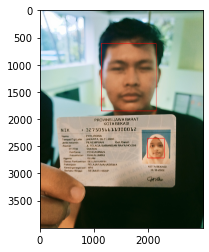

In [67]:
import matplotlib.pyplot as plt
# load image from file
filename = "aldocha.jpg"
pixels = plt.imread(filename)
print("Shape of image/array:",pixels.shape)
imgplot = plt.imshow(pixels)
plt.show()

We can see here that the detected faces are having red box over it. It means the MTCNN succeded to detected the faces in the photo and ID

## IV. Crop Detected Faces

In [5]:
def emosion_detector(image):
    face_vector = []
    face_detector = MTCNN() #Load model pendeteksi wajah (MTCNN)

    img = plt.imread(image) #Load gambar
    faces = face_detector.detect_faces(img) #Deteksi wajah-wajah yang ada di gambar

    for i in range(len(faces)):
        x, y, w, h = faces[i]['box'] #Ambil koordinat area wajah yang terdeteksi
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 6) #Buat persegi panjang yang sesuai dengan koordinat area wajah dengan warna merah (255,0,0) dan ketebalan 6 pt
        crop = cv2.resize(img[y:y+h,x:x+w],(224,224)) #Potong gambar sesuai dengan area wajah dan mengubah ukuran ke 224x224
        cv2.imwrite(f"face_img{i+1}.jpg",crop)
    

The detected faces are cropped and save into two different files.

In [6]:
faces = emosion_detector('ochaktp.jpg')

1/1 [==============================] - 0s 492ms/step


## V. Extracting Face Features Using Deepface

In [7]:
vk1 = DeepFace.represent(img_path='face_img1.jpg', enforce_detection=False)
vk2 = DeepFace.represent(img_path='face_img2.jpg', enforce_detection=False)

1/1 [==============================] - 0s 397ms/step


This code output is a series of vector containing the extracted features from the cropped faces image.

## VI. Cosine Similarity

In [10]:
cosine_similarity(np.array([vk1]), np.array([vk2]))

array([[0.78701195]])

In [11]:
CS = cosine_similarity(np.array([vk1]), np.array([vk2]))

if CS > 0.6:
    print('The pictures match')
else:
    print('The pictures do not match')

The pictures match


At last we calculate the cosine similarity to find out how similar is the two faces actually. Here we set the threshold at 0.6.

IX. Conclusion & Model Improvement

The conclusion is we have succeded to combined two pretrained model with cosine similarity calculation to predict whether the image are matched or not. But we have some challenges regarding the lower resolution image. When the resolution is low it actually decreasing the performance of the model. Therefore, further processing for lower-resolution images is indeed necessary.

In addition to model improvement, an extension of the system could also be done. To elaborate, these are just some of the additions that the system could apply:

- Finger-print ID check system with integration to the National Population and Civil Registration Agency (Dukcapil).
- Integrated financial background check which connects Soter to Bank Accounts for faster and more efficient applications.